<a href="https://colab.research.google.com/github/Hanabi0127/Projects/blob/main/Loan_Eligibility_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Eligibility Prediction**

##**Introduction**

The dataset is sourced from Kaggle and I will be using this dataset to perform fundamental EDA, data cleaning, and build prediction models to predict our test data to observe which prediction model has the highest accuracy.

####**Original Kaggle dataset url:**
https://www.kaggle.com/datasets/avineshprabhakaran/loan-eligibility-prediction/data/code/code

According to the Kaggle dataset description, the dataset is designed to help whether a loan applicant is eligible for loan approval based on demographics, financial, and credit-related factors. The objective is to predict loan approval status based on applicant details and financial data.

For this analysis, I will follow the guidance of example ML workflow in the data description with additional data visualization.

##**Example ML Workflow**

####**Data Cleaning & EDA**

*   Perform a fundamental EDA and Data Cleaning if needed.
*   Data visualization

####**Feature Engineering**

*    Create Total_Income = Applicant_Income + Coapplicant_Income
*    Add derived metrics like LoanAmount_to_Income_Ratio

####**Model Building & Encoding**

*   Handle categorical columns using Label or One-Hot Encoding
*    Train and validate classification models
*    Evaluate performance using Accuracy, F1-Score, ROC-AUC

####**Insights**

*    Determine which features most influence loan eligibility


#**Column information**

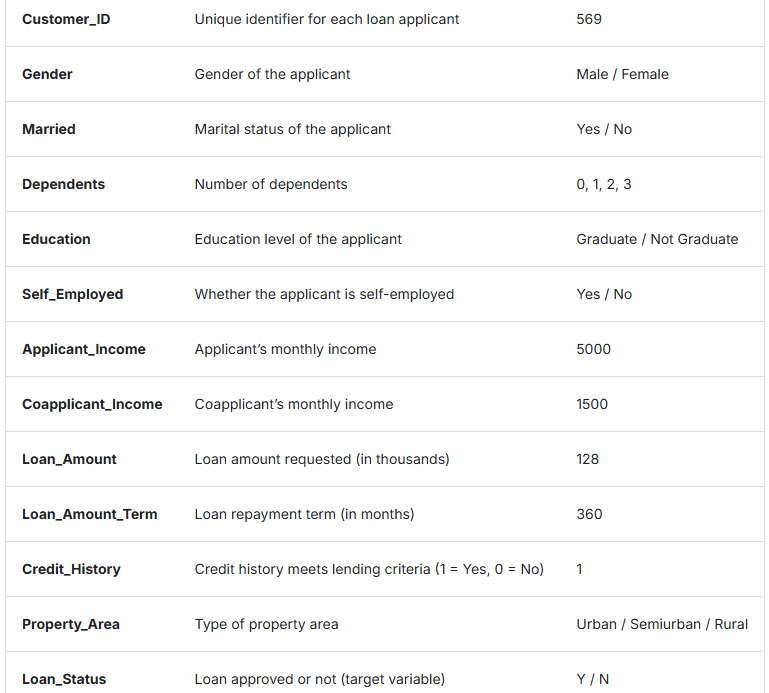

#**Data Cleaning & Encoding**

In this section, we will import the dataset to our notebook, then we will perform a fundamental EDA(Exploratory Data Analysis) to summarize the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# Import dataset

import kagglehub

# Download latest version
path = kagglehub.dataset_download("avineshprabhakaran/loan-eligibility-prediction")

print("Path to dataset files:", path)

for dirname, _, filenames in os.walk(path):
  for filename in filenames:
    print(os.path.join(dirname, filename))

100%|██████████| 7.39k/7.39k [00:00<00:00, 21.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/avineshprabhakaran/loan-eligibility-prediction/versions/3
/root/.cache/kagglehub/datasets/avineshprabhakaran/loan-eligibility-prediction/versions/3/Loan Eligibility Prediction.csv


In [ ]:
# Load dataset
df = pd.read_csv('/root/.cache/kagglehub/datasets/avineshprabhakaran/loan-eligibility-prediction/versions/3/Loan Eligibility Prediction.csv')
df.head()

,Customer_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,569,Female,No,0,Graduate,No,2378,0.0,9,360,1,Urban,N
1,15,Male,Yes,2,Graduate,No,1299,1086.0,17,120,1,Urban,Y
2,95,Male,No,0,Not Graduate,No,3620,0.0,25,120,1,Semiurban,Y
3,134,Male,Yes,0,Graduate,Yes,3459,0.0,25,120,1,Semiurban,Y
4,556,Male,Yes,1,Graduate,No,5468,1032.0,26,360,1,Semiurban,Y


In [ ]:
# Check the list of columns
list(df.columns)

# Check the number of Categorical and Numerical
df.info()

print('\n----------------------------------------------------------\n')

quan_cols = df.select_dtypes(include=['int64', 'float64']).columns
cate_cols = df.select_dtypes(include=['object']).columns

print("List of Categorical columns \n")

for i, col in enumerate(cate_cols):
  print("{}. {}".format(i+1,col))

print("\nList of Numerical columns \n")

for i, col in enumerate(quan_cols):
  print("{}. {}".format(i+1,col))

# Check the number of rows in the dataset
print(f"\nTotal number of rows in the dataset: {len(df)}")

print('\n----------------------------------------------------------\n')

# Missing value rate
for col in df.columns:
  MissingPercentage = df[col].isna().sum() / len(df) * 100

  if MissingPercentage >= 0:
    print("{} null rate: {} %".format(col,round(MissingPercentage, 2)))

print('\n----------------------------------------------------------\n')

# Check duplicate rows
print("Number of duplicates: {}".format(df.duplicated().sum()))

# Value counts for each categorical columns.
for col in cate_cols:
    print(df[col].value_counts())
    print('\n----------------------------------------------------------\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         614 non-null    int64  
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    int64  
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Applicant_Income    614 non-null    int64  
 7   Coapplicant_Income  614 non-null    float64
 8   Loan_Amount         614 non-null    int64  
 9   Loan_Amount_Term    614 non-null    int64  
 10  Credit_History      614 non-null    int64  
 11  Property_Area       614 non-null    object 
 12  Loan_Status         614 non-null    object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.5+ KB

----------------------------------------------------------

List of Categorical columns 

1. Gen

In [ ]:
# Statistical Sumamry
df.describe()

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,307.500000,0.856678,5403.459283,1621.245798,142.022801,338.892508,0.850163
std,177.390811,1.216651,6109.041673,2926.248369,87.083089,69.716355,0.357203
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,154.250000,0.000000,2877.500000,0.000000,98.000000,360.000000,1.000000
50%,307.500000,0.000000,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,460.750000,2.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,614.000000,4.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


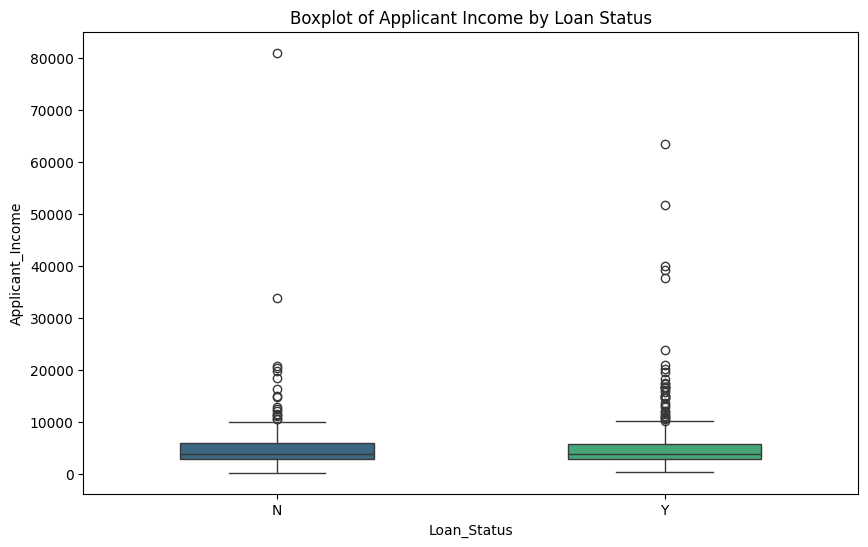


----------------------------------------------------------

Lower Bound: -5875.0
Upper Bound: 14547.5

----------------------------------------------------------

Summary
There are 32 outliers to remove from the dataset. Proceeding to remove these entries.

----------------------------------------------------------



In [ ]:
# Checking outliers with boxplot and IQR method.
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x = 'Loan_Status', y = 'Applicant_Income', hue = 'Loan_Status', palette='viridis', width = 0.5)
plt.title('Boxplot of Applicant Income by Loan Status')
plt.show()

print('\n----------------------------------------------------------\n')

# IQR Method to determine outliers.
Q1 = df['Applicant_Income'].quantile(0.25)
Q3 = df['Applicant_Income'].quantile(0.75)
IQR = Q3 - Q1

# Changed empirical constant from 1.5 to 3 to detect extreme outliers.
lower_b = Q1 - 3*IQR
upper_b = Q3 + 3*IQR

print("Lower Bound: {}".format(lower_b))
print("Upper Bound: {}".format(upper_b))

print('\n----------------------------------------------------------\n')

outliers = df[(df['Applicant_Income'] < lower_b) | (df['Applicant_Income'] > upper_b)]
print("Summary\nThere are {} outliers to remove from the dataset. Proceeding to remove these entries.".format(outliers.value_counts().sum()))

print('\n----------------------------------------------------------\n')

outliers_index = outliers.index
df.drop(outliers_index, inplace=True)


Let's create a column named *Total_Income*. This will be the sum of *Applicant_Income* and *Coapplicant_Income*.

In [ ]:
# Craete Total_Income and summarize.
df['Total_Income'] = df['Applicant_Income'] + df['Coapplicant_Income']
print(df[['Customer_ID','Applicant_Income','Coapplicant_Income','Total_Income']])

# Create Loan_Amount to income ratio column.
df['Loan_Amount_to_Ratio'] = df['Loan_Amount']*1000/df['Total_Income']
print(df[['Customer_ID','Loan_Amount','Total_Income','Loan_Amount_to_Ratio']])

# Let's see the statisticaal summary with added column.
df.describe()


     Customer_ID  Applicant_Income  Coapplicant_Income  Total_Income
0            569              2378                 0.0        2378.0
1             15              1299              1086.0        2385.0
2             95              3620                 0.0        3620.0
3            134              3459                 0.0        3459.0
4            556              5468              1032.0        6500.0
..           ...               ...                 ...           ...
609          480              2947              1603.0        4550.0
610          525              4680              2087.0        6767.0
611          551              6633                 0.0        6633.0
612          552              2492              2375.0        4867.0
613          606              2400              3800.0        6200.0

[582 rows x 4 columns]
     Customer_ID  Loan_Amount  Total_Income  Loan_Amount_to_Ratio
0            569            9        2378.0              3.784693
1             15

,Customer_ID,Dependents,Applicant_Income,Coapplicant_Income,Loan_Amount,Loan_Amount_Term,Credit_History,Total_Income,Loan_Amount_to_Ratio
count,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000,582.000000
mean,305.288660,0.845361,4358.183849,1672.505017,132.876289,338.556701,0.848797,6030.688866,23.596038
std,178.415205,1.202466,2310.550227,2971.372575,66.199707,70.285227,0.358555,3451.503730,8.611409
min,1.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,1442.000000,1.327042
25%,151.250000,0.000000,2773.000000,0.000000,96.250000,360.000000,1.000000,4086.500000,19.295692
50%,304.500000,0.000000,3705.500000,1301.000000,123.500000,360.000000,1.000000,5241.500000,24.174348
75%,457.750000,2.000000,5328.750000,2333.000000,160.000000,360.000000,1.000000,6936.000000,28.143120
max,614.000000,4.000000,13650.000000,41667.000000,496.000000,480.000000,1.000000,42083.000000,82.711645


Loan_Status
N    24.066783
Y    23.380132
Name: Loan_Amount_to_Ratio, dtype: float64


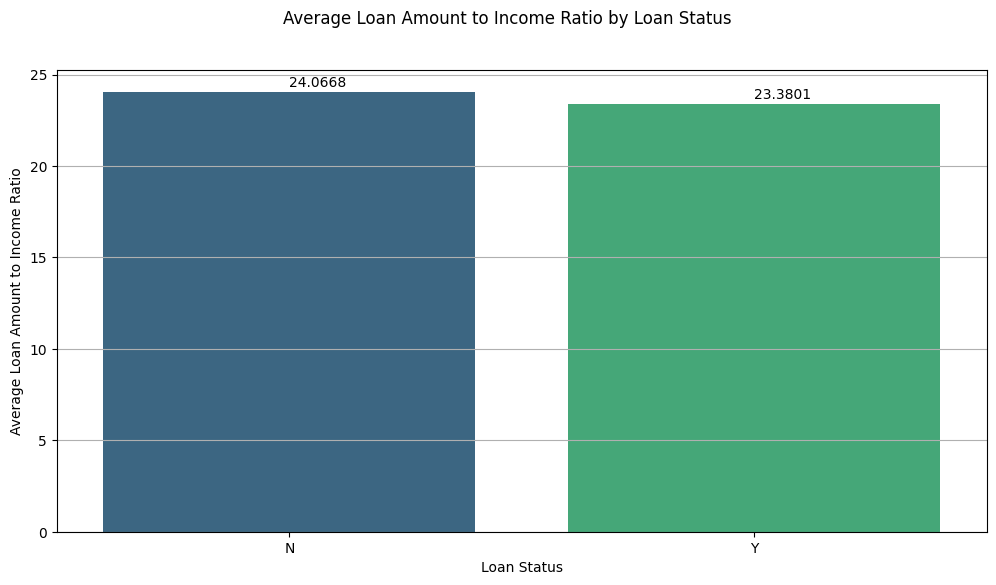

In [ ]:
# Groupby Loan_Status and compare the average Loan_Amount_to_Ratio.
df_Loan_Status = df.groupby('Loan_Status')['Loan_Amount_to_Ratio'].mean()
print(df_Loan_Status)

plt.figure(figsize=(12,6))
sns.barplot(x=df_Loan_Status.index, y=df_Loan_Status.values, hue=df_Loan_Status.index, palette='viridis')
plt.suptitle('Average Loan Amount to Income Ratio by Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Average Loan Amount to Income Ratio')
plt.grid(axis='y')

# Label them.

for i, value in enumerate(df_Loan_Status.values):
  plt.text(i, value + 0.5, str(round(value,4)), va='center')
plt.show()

A higher Loan Amount to Income Ratio indicates that the loan amount is relatively large compared to the household's total income. While we cannot draw a definitive conclusion yet, approved applicants generally show a lower Loan Amount to Income Ratio than those who were rejected.

1. 490 applicants chose 360 months repayment plan. - 84.19%
2. 41 applicants chose 180 months repayment plan. - 7.04%
3. 14 applicants chose 480 months repayment plan. - 2.41%
4. 12 applicants chose 120 months repayment plan. - 2.06%
5. 12 applicants chose 300 months repayment plan. - 2.06%
6. 4 applicants chose 240 months repayment plan. - 0.69%
7. 4 applicants chose 84 months repayment plan. - 0.69%
8. 2 applicants chose 36 months repayment plan. - 0.34%
9. 2 applicants chose 60 months repayment plan. - 0.34%
10. 1 applicants chose 12 months repayment plan. - 0.17%

----------------------------------------------------------

Loan_Status           N      Y
Loan_Amount_Term              
12                  0.0    1.0
36                  2.0    0.0
60                  0.0    2.0
84                  1.0    3.0
120                 4.0    8.0
180                15.0   26.0
240                 1.0    3.0
300                 5.0    7.0
360               146.0  344.0
480                 9.0 

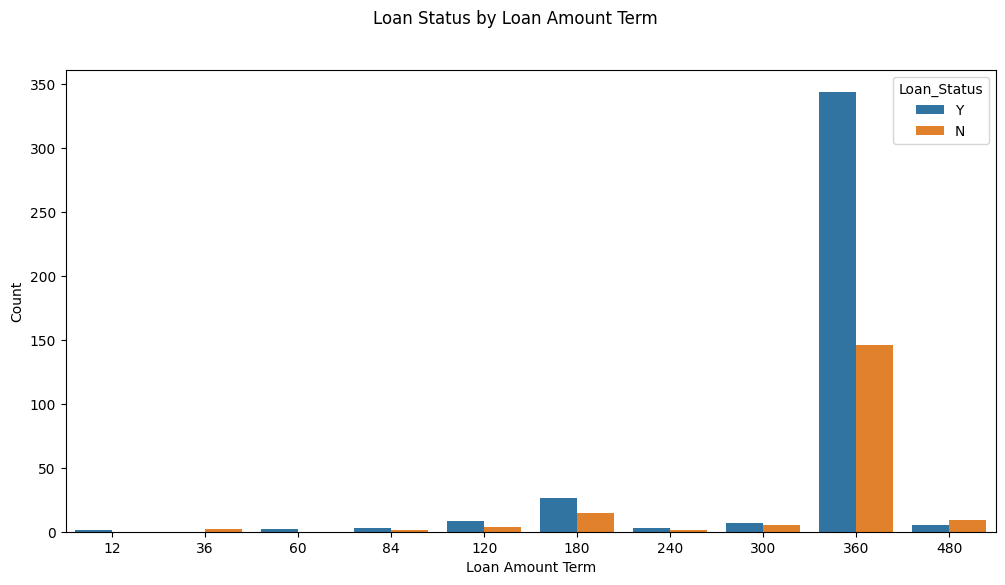

In [ ]:
# Loan Status by Loan Amount Term.
loan_amount_df = df['Loan_Amount_Term'].value_counts()

for i, month in enumerate(loan_amount_df):
  print("{}. {} applicants chose {} months repayment plan. - {:.2f}%".format(i+1,month,loan_amount_df.index[i],month/len(df)*100))

print('\n----------------------------------------------------------\n')

#Unstacked value counts for Loan Status vs Loan Amount Term.
loan_amount_df_unstacked = df.groupby('Loan_Amount_Term')['Loan_Status'].value_counts().unstack().fillna(0).sort_index()
print(loan_amount_df_unstacked)

plt.figure(figsize=(12,6))
sns.countplot(data = df, x='Loan_Amount_Term', hue='Loan_Status')
plt.suptitle('Loan Status by Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.show()


In total, *490* applicants selected the 360-month repayment plan, representing *84.19%* of all applications, followed by *44* applicants who chose the 180-month repayment plan, accounting for *7.04%*. This helps identify which repayment plan received the most applications and how they are centrally distributed.

Self_Employed
No     5891.920159
Yes    6901.462500
Name: Total_Income, dtype: float64


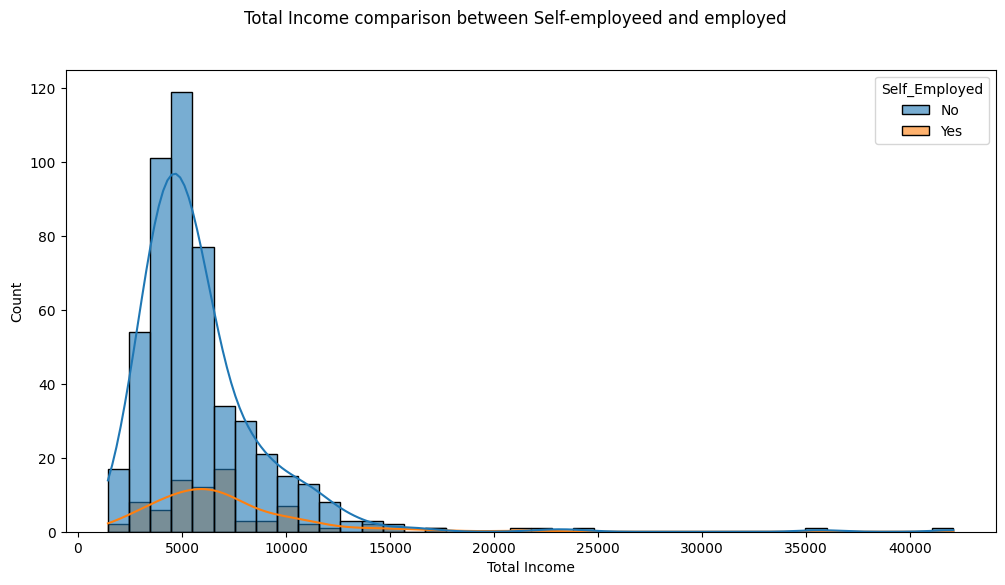

In [ ]:
# Average total Income comparison between Self-employeed and employed.
self_emp_df = df.groupby('Self_Employed')['Total_Income'].mean()
print(self_emp_df)

# Histogram to check the distribution between Self_Employed and Employed.
plt.figure(figsize=(12,6))
sns.histplot(data = df, x='Total_Income', hue='Self_Employed', bins=40, alpha = 0.6, kde=True)
plt.suptitle('Total Income comparison between Self-employeed and employed')
plt.xlabel('Total Income')
plt.show()

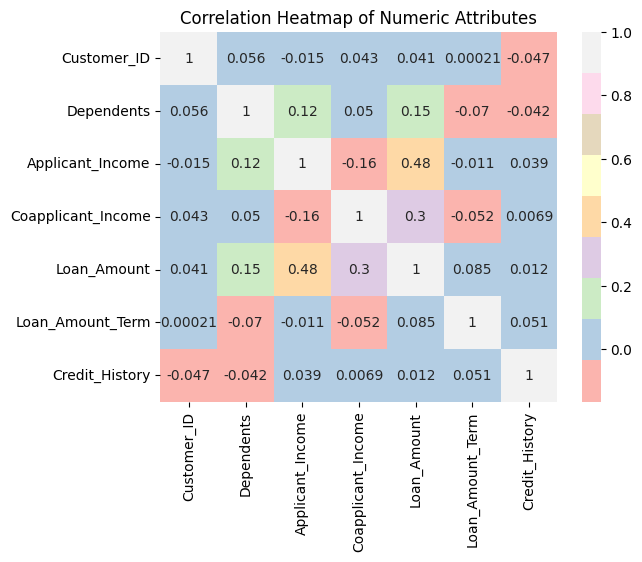

In [ ]:
# Let's create a correlation heatmap for Numeric Attributes.
sns.heatmap(df[quan_cols].corr(), annot=True, cmap='Pastel1')
plt.title('Correlation Heatmap of Numeric Attributes')
plt.show()

The correlation heatmap shows how strongly two numerical attributes are related to each other. As a result, we observed a positive correlation between *Loan_Amount* and *Applicant_Income* and *Coapplicant_Income* which is a natural financial phenomenon, as higher income households tend to qualify for greater borrowing capacity and therefore the correlation between them would be strong. Let's create a scatterplot to visualize the correlation.

Text(0.5, 1.0, 'Scatterplot of Loan_Amount and Total_Income')

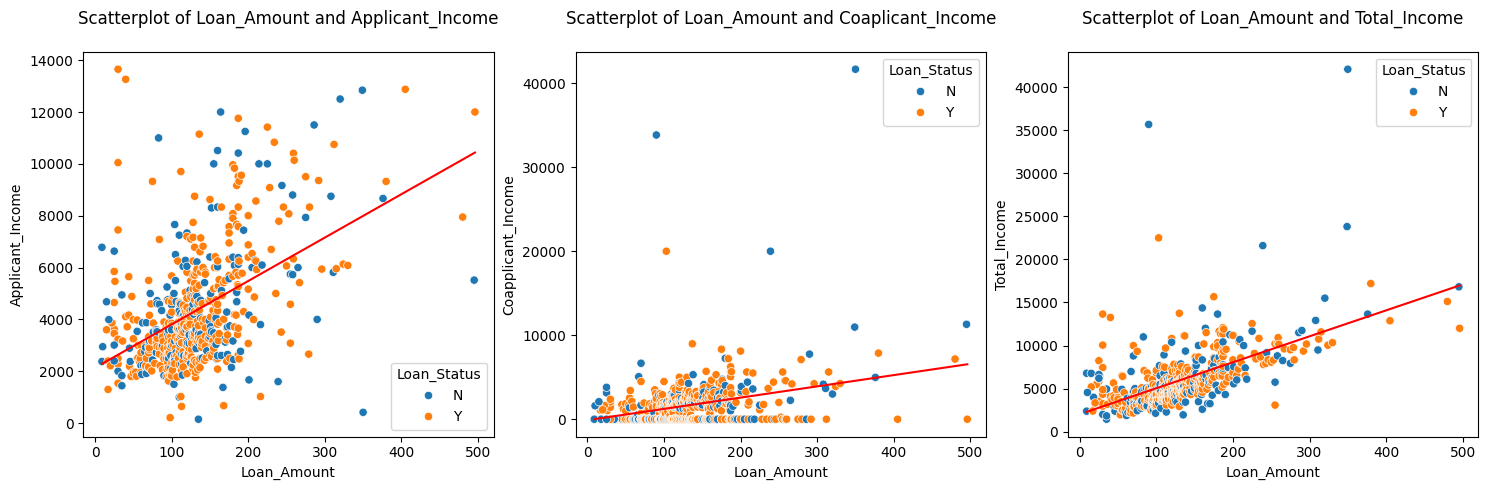

In [ ]:
# Scatterplot of Loan_Amount and Applicant_income & Coapplicant_income & Total_Income.

fig, ax = plt.subplots(1,3, figsize=(18,5))

# Loan_Amount vs Applicant_Income
sns.scatterplot(data=df, x='Loan_Amount', y='Applicant_Income', hue='Loan_Status',ax=ax[0])
sns.regplot(data=df, x='Loan_Amount', y='Applicant_Income', scatter = False, ci = False, line_kws = {'color': 'red', 'linewidth': 1.5}, ax=ax[0])
ax[0].set_title('Scatterplot of Loan_Amount and Applicant_Income', pad = 20)

# Loan_Amount vs Coapplicant_Income
sns.scatterplot(data=df, x='Loan_Amount', y='Coapplicant_Income', hue='Loan_Status',ax=ax[1])
sns.regplot(data=df, x='Loan_Amount', y='Coapplicant_Income', scatter = False, ci = False, line_kws = {'color': 'red', 'linewidth': 1.5}, ax=ax[1])
ax[1].set_title('Scatterplot of Loan_Amount and Coaplicant_Income', pad = 20)

# Loan_Amount vs Total_Income
sns.scatterplot(data=df, x='Loan_Amount', y='Total_Income', hue='Loan_Status',ax=ax[2])
sns.regplot(data=df, x='Loan_Amount', y='Total_Income', scatter = False, ci = False, line_kws = {'color': 'red', 'linewidth': 1.5}, ax=ax[2])
ax[2].set_title('Scatterplot of Loan_Amount and Total_Income', pad = 20)

Positive slope indicates a positive proportional relationship between the two variables. The first graph shows the strongest correlation, meaning Loan_Amount increases most consistently as Applicant_Income increases. All the other regression lines also show a positive relationship, but their correlations are weaker compared to the first graph. Let's begin the next analysis with some research questions. The questions are following:

1. Do graduates earn more income than non-graduates? Is it statistically significant?
2. How many cases that Copplicant earn more income than actual applicant, and how many of these applications are rejected?
3. What's the average income level by property area type? Do applicants residing in urban areas earn more income than those residing in rural areas?

Average income of Graduate: $4590.52
Average income of Not Graduate: $3566.12
The difference between two group is $1024.40.

----------------------------------------------------------

Summary of Graduate's income

count      450.000000
mean      4590.522222
std       2463.000814
min        150.000000
25%       2949.500000
50%       3814.500000
75%       5706.750000
max      13650.000000
Name: Applicant_Income, dtype: float64

----------------------------------------------------------

Summary of Non-Graduate's income

count     132.000000
mean     3566.121212
std      1437.890403
min       210.000000
25%      2574.750000
50%      3345.000000
75%      4291.000000
max      7667.000000
Name: Applicant_Income, dtype: float64

----------------------------------------------------------



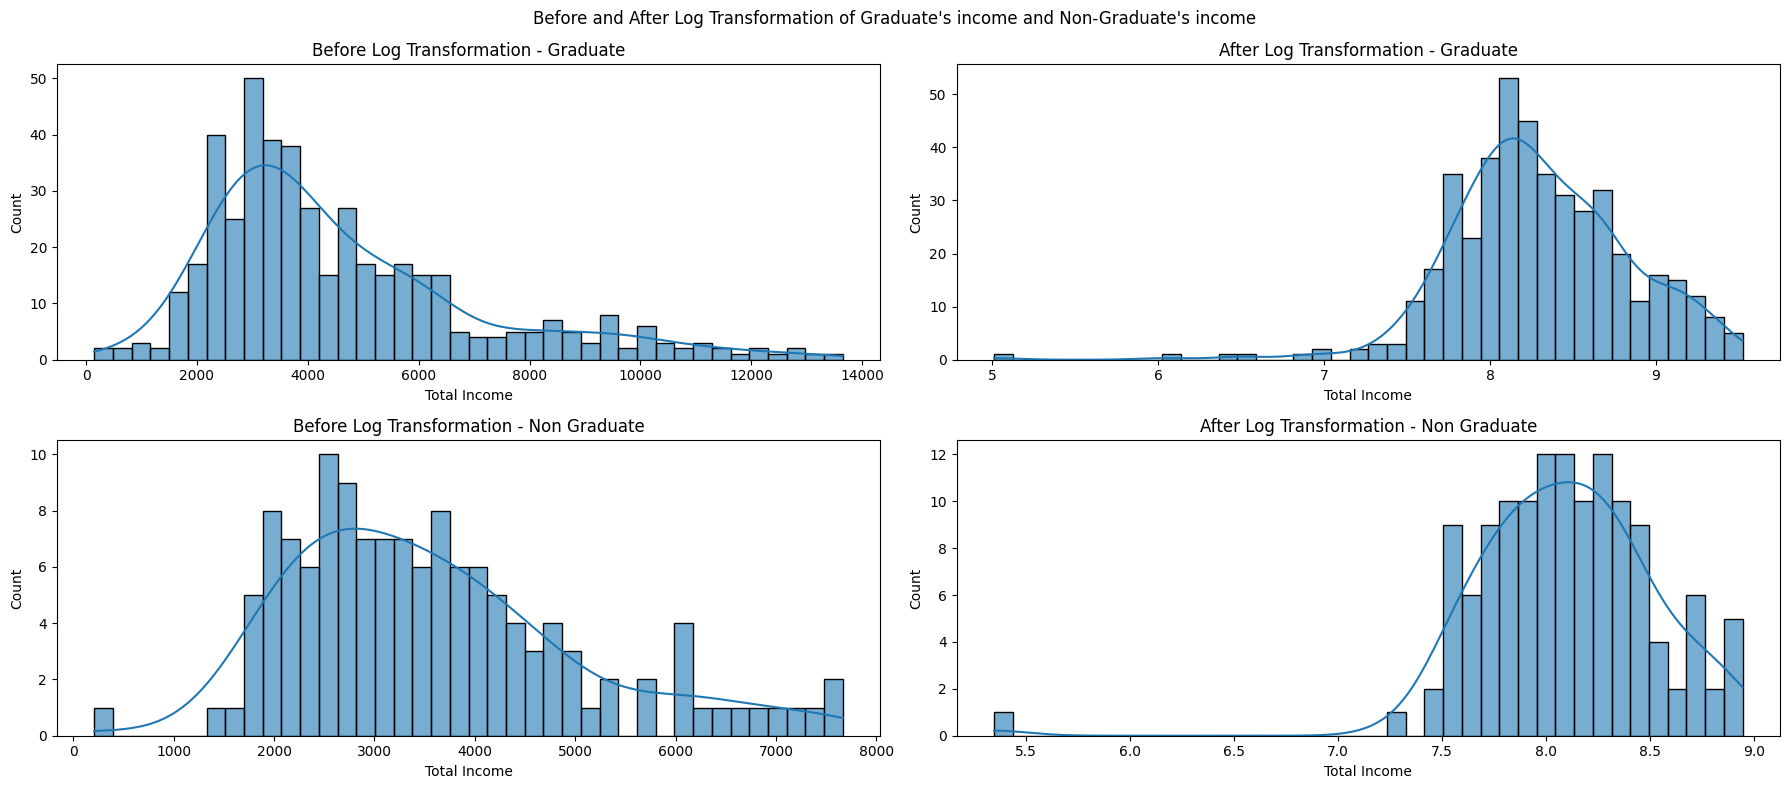


----------------------------------------------------------

Result of Log-Welch t-test
T-statistic: 4.40
P-value: 0.0000

----------------------------------------------------------

Conclusion
Graduate applicants earn approximately 22.53% more than non-graduates applicants.


In [ ]:
# Question 1
education_income_df = df.groupby('Education')['Applicant_Income'].mean()

for i, col in enumerate(education_income_df):
  print("Average income of {}: ${:.2f}".format(education_income_df.index[i], col))

print("The difference between two group is ${:.2f}.".format(education_income_df.iloc[0] - education_income_df.iloc[1]))

print('\n----------------------------------------------------------\n')

grad_income_df = df[df['Education'] == 'Graduate']['Applicant_Income']
non_grad_income_df = df[df['Education'] == 'Not Graduate']['Applicant_Income']

print("Summary of Graduate's income\n")
print(grad_income_df.describe())
print('\n----------------------------------------------------------\n')
print("Summary of Non-Graduate's income\n")
print(non_grad_income_df.describe())
print('\n----------------------------------------------------------\n')

# Log Transformation + Histogram to check normality

log_grad_income = np.log(grad_income_df)
log_non_grad_income = np.log(non_grad_income_df)

fig, ax = plt.subplots(2,2, figsize=(18,8))
sns.histplot(data = grad_income_df, bins=40, alpha = 0.6, kde=True, ax=ax[0,0])
plt.suptitle('Before and After Log Transformation of Graduate\'s income and Non-Graduate\'s income')
ax[0,0].set_title("Before Log Transformation - Graduate")
ax[0,0].set_xlabel('Total Income')

sns.histplot(data = log_grad_income, bins=40, alpha = 0.6, kde=True, ax=ax[0,1])
ax[0,1].set_title("After Log Transformation - Graduate")
ax[0,1].set_xlabel('Total Income')

sns.histplot(data = non_grad_income_df, bins=40, alpha = 0.6, kde=True, ax=ax[1,0])
ax[1,0].set_title("Before Log Transformation - Non Graduate")
ax[1,0].set_xlabel('Total Income')

sns.histplot(data = log_non_grad_income, bins=40, alpha = 0.6, kde=True, ax=ax[1,1])
ax[1,1].set_title("After Log Transformation - Non Graduate")
ax[1,1].set_xlabel('Total Income')

plt.tight_layout()
plt.show()


# Hypothesis test.
# Null Hypothesis - H0: Average income of Graduate > Average income of Non-graduate
# Alternative Hypothesis - H1: Average income of Graduate and Average income of Non-graduate are not equal.

# Log-transformed Welch's t-test

from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(log_grad_income, log_non_grad_income, equal_var=False)

# Graduate > Non-Graduate
p_value_one_sided = p_value / 2

print('\n----------------------------------------------------------\n')
print('Result of Log-Welch t-test')
print("T-statistic: {:.2f}".format(t_statistic))
print("P-value: {:.4f}".format(p_value_one_sided))

# Pecentage difference between mean of Graudate's income and non-Graduate's income.
print('\n----------------------------------------------------------\n')
log_diff = log_grad_income.mean() - log_non_grad_income.mean()
percent_diff = (np.exp(log_diff) - 1) * 100
print("Conclusion\nGraduate applicants earn approximately {:.2f}% more than non-graduates applicants.".format(percent_diff))


Conclusively, a Welch’s t-test conducted on log-transformed income revealed that graduates earn significantly more than non-graduates (t = 4.40, p < 0.001). This result indicates that graduation is associated with a statistically significant 22.53% higher income.

Loan_Status
N    26
Y    46
dtype: int64

----------------------------------------------------------
Average differences in Applicant's income and Coapplicant's income

Loan_Status
N    4922.961538
Y    1877.521739
Name: income_diff, dtype: float64

----------------------------------------------------------



/tmp/ipython-input-1868270026.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coapplicant_df['income_diff'] = coapplicant_df['Coapplicant_Income'] - coapplicant_df['Applicant_Income']


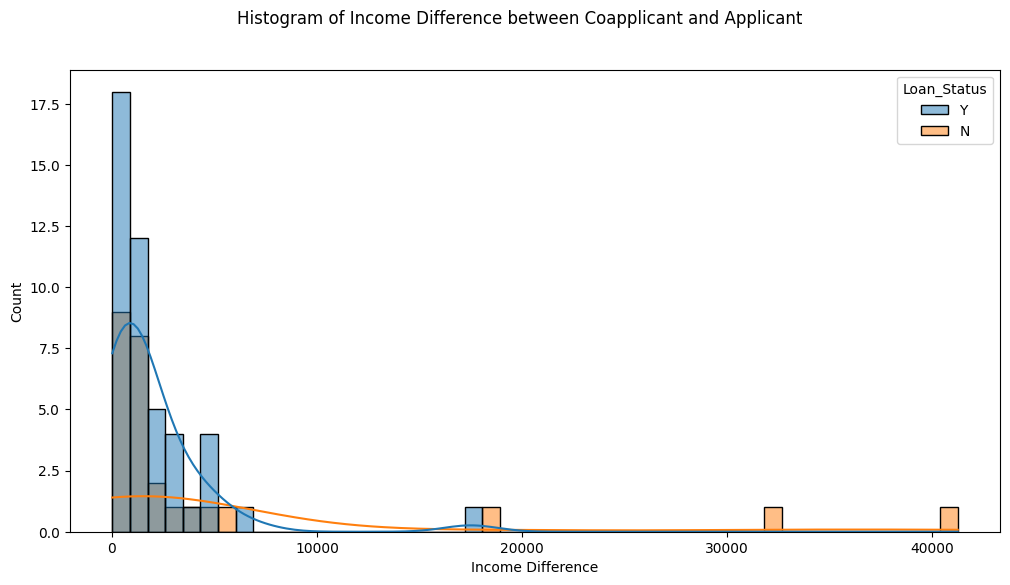

In [ ]:
# Question 2
coapplicant_df = df[df["Coapplicant_Income"] > df["Applicant_Income"]]
print(coapplicant_df.groupby('Loan_Status').size())

# What is the average differences in Applicant's income and Coapplicant Income for each status?
print('\n----------------------------------------------------------\nAverage differences in Applicant\'s income and Coapplicant\'s income\n')
coapplicant_df['income_diff'] = coapplicant_df['Coapplicant_Income'] - coapplicant_df['Applicant_Income']
print(coapplicant_df.groupby('Loan_Status')['income_diff'].mean())
print('\n----------------------------------------------------------\n')

# Histogram
plt.figure(figsize=(12,6))
sns.histplot(data = coapplicant_df, x='income_diff', hue='Loan_Status', kde = True)
plt.suptitle('Histogram of Income Difference between Coapplicant and Applicant')
plt.xlabel('Income Difference')
plt.show()

To answer our question, a total of 72 applications show that the coapplicant has a higher income than the primary applicant, among which 26 applications were rejected. As shown in the histogram above, most of our data are clustered between \$0 and \$7,000 in income difference, with a mixture of both approved (Y) and rejected (N) loan statuses. However, as the income difference increases toward the right tail of the distribution, the number of approved applications markedly decreases. This suggests that while outcomes within the \$0 to \$7000 range vary due to external factors, a larger income gap between the applicant and coapplicant tends to be associated with a higher likelihood of loan
rejection.


Property_Area
Rural        6133.894201
Semiurban    5878.959276
Urban        6114.493750
Name: Total_Income, dtype: float64

----------------------------------------------------------

Property_Area
Rural        169
Semiurban    221
Urban        192
Name: Total_Income, dtype: int64


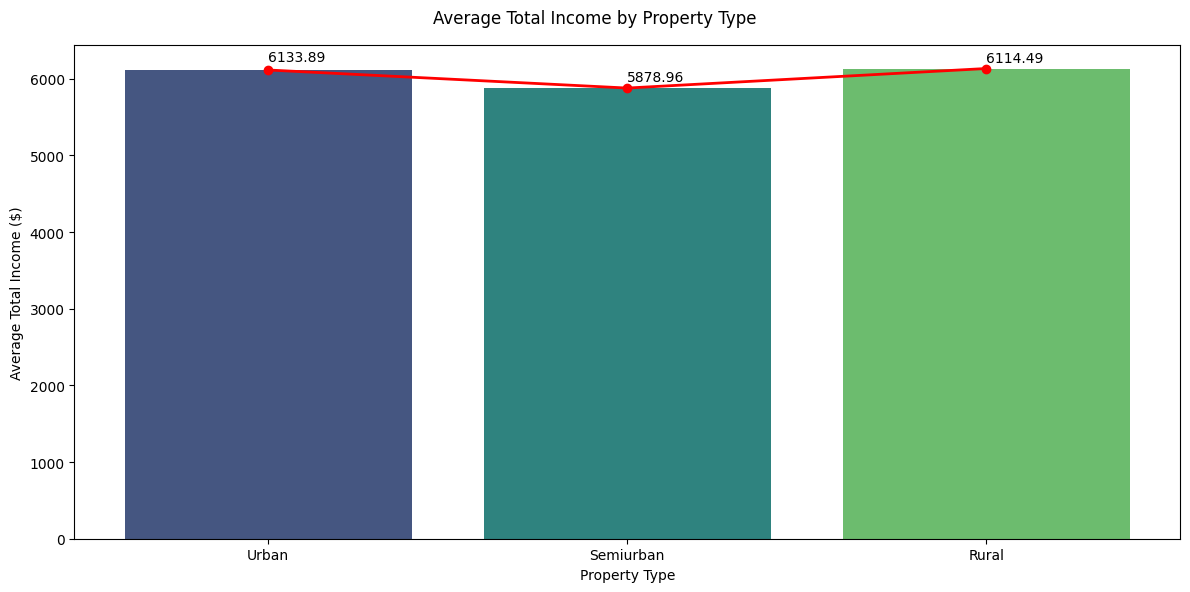

In [ ]:
# Average Total income by property area type
property_df = df.groupby('Property_Area')['Total_Income'].mean()
print(property_df)
print('\n----------------------------------------------------------\n')
print(df.groupby('Property_Area')['Total_Income'].size())

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Property_Area', y = 'Total_Income', hue='Property_Area', palette='viridis', estimator = 'mean', errorbar = None)
plt.plot(property_df.index, property_df.values, linestyle = '-', marker = 'o', linewidth = 2, color = 'red')
plt.suptitle('Average Total Income by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Average Total Income ($)')

for i, value in enumerate(property_df.values):
  plt.text(i, value + 150, str(round(value,2)), va='center')

plt.tight_layout()
plt.show()

The answer is No. There is no significant differences in average income level by property area type.

## Model Building & Encoding ##

 We will be using 3 different prediction models to predict loan status and compare each model's performance by it's accuracy, AUC (Area under the ROC curve), and F1 score. Here's the list of 3 methods that we will be using.

 1. XGBClassifier
 2. LogisticRegression
 3. RandomForestClassifier

 Before we build our models, let's perform a feature scaling to transform our dataset. It is a mandatory procedure before we pass down our data to train the models. It will standardize the features by removing the mean and scaling to unit variance.

In [ ]:
# Convert categorical labels into numerical labels.

# Model libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

# Evaluation libraries
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score

le = LabelEncoder()

model_df = df.copy()

for col in cate_cols:
  model_df[col] = le.fit_transform(model_df[col])

# Split our dataset

x = model_df.drop('Loan_Status', axis=1)
y = model_df['Loan_Status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state = 42)

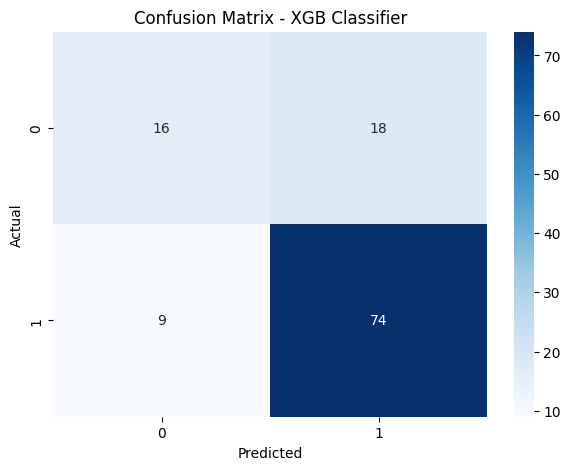


----------------------------------------------------------

Accuracy: 0.7692
AUC: 0.7757
F1 Score: 0.8457


In [ ]:
# Model 1 : XGB Classifier

model_1 = XGBClassifier(
    n_estimators = 300,
    learning_rate = 0.05,
    eval_metric = 'logloss',
    max_depth = 4,
    subsample = 0.8,
    colsample_bytree = 0.8,
    random_state = 42
)

model_1.fit(x_train, y_train)

y_pred_1 = model_1.predict(x_test)
y_prob = model_1.predict_proba(x_test)[:, 1]

acc_1 = accuracy_score(y_test, y_pred_1)
auc_1 = roc_auc_score(y_test, y_prob)
f1_1 = f1_score(y_test, y_pred_1)

cm_1 = confusion_matrix(y_test, y_pred_1)

plt.figure(figsize=(7,5))
sns.heatmap(cm_1, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - XGB Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('\n----------------------------------------------------------\n')
print(f"Accuracy: {acc_1:.4f}")
print(f"AUC: {auc_1:.4f}")
print(f"F1 Score: {f1_1:.4f}")



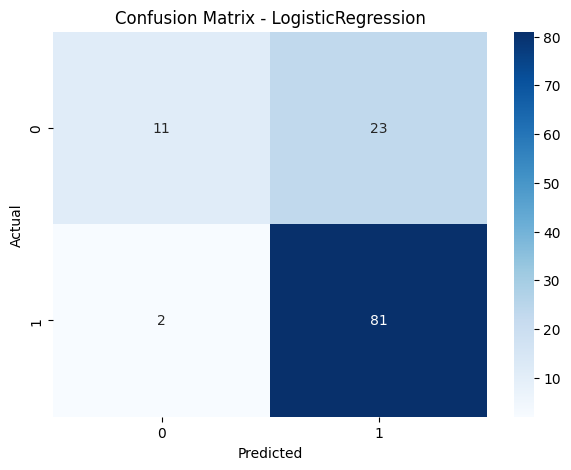


----------------------------------------------------------

Accuracy: 0.7863
AUC: 0.6967
F1 Score: 0.8663


In [ ]:
# Model 2 : LogisticRegression

log_pipe_1 = Pipeline([
    ("scaler", RobustScaler()),
    ("model", LogisticRegression(max_iter = 1000, random_state = 42))
])

model_2 = log_pipe_1.fit(x_train, y_train)

y_pred_2 = model_2.predict(x_test)
y_prob_2 = model_2.predict_proba(x_test)[:, 1]

acc_2 = round(accuracy_score(y_test,y_pred_2),4)
auc_2 = round(roc_auc_score(y_test,y_prob_2),4)
f1_2 = round(f1_score(y_test,y_pred_2),4)

cm_2 = confusion_matrix(y_test, y_pred_2)

plt.figure(figsize=(7,5))
sns.heatmap(cm_2, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - LogisticRegression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('\n----------------------------------------------------------\n')

print(f"Accuracy: {acc_2}")
print(f"AUC: {auc_2}")
print(f"F1 Score: {f1_2}")


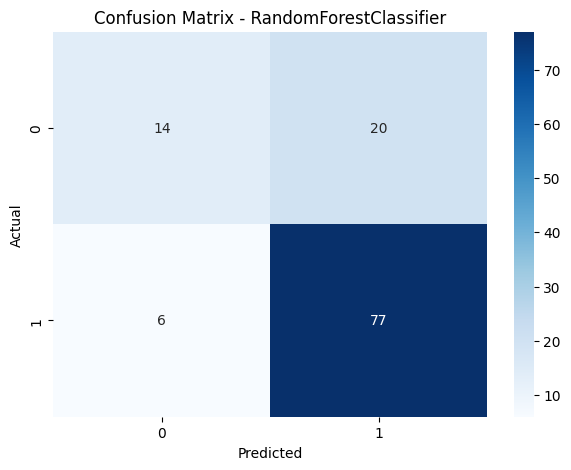


----------------------------------------------------------

Accuracy: 0.7778
AUC: 0.731
F1 Score: 0.8556


In [ ]:
# Model 3 : RandomForestClassifier

log_pipe_2 = Pipeline([
    ("scaler", RobustScaler()),
    ("model", RandomForestClassifier(n_estimators = 800,
                                     max_depth = 12,
                                     min_samples_split = 10,
                                     min_samples_leaf = 8,
                                     max_features = 0.5,
                                     class_weight = "balanced",
                                     bootstrap = True,
                                     random_state = 42))
])

model_3 = log_pipe_2.fit(x_train, y_train)

y_pred_3 = model_3.predict(x_test)
y_prob_3 = model_3.predict_proba(x_test)[:, 1]

acc_3 = round(accuracy_score(y_test,y_pred_3),4)
auc_3 = round(roc_auc_score(y_test,y_prob_3),4)
f1_3 = round(f1_score(y_test,y_pred_3),4)

cm_3 = confusion_matrix(y_test, y_pred_3)

plt.figure(figsize=(7,5))
sns.heatmap(cm_3, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - RandomForestClassifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print('\n----------------------------------------------------------\n')

print(f"Accuracy: {acc_3}")
print(f"AUC: {auc_3}")
print(f"F1 Score: {f1_3}")

In [ ]:
# Result

result = {"Models": ["XGB Classifier", "Logistic Regression", "RandomForestClassifier"],
          "Accuracy": [acc_1, acc_2, acc_3],
          "AUC" : [auc_1, auc_2, auc_3],
          "F1 Score": [f1_1, f1_2, f1_3]}

df_result = pd.DataFrame(result).set_index("Models")
df_result.sort_values(by = "Accuracy", ascending = False, inplace = True)
df_result


,Accuracy,AUC,F1 Score
Models,,,
Logistic Regression,0.786300,0.696700,0.866300
RandomForestClassifier,0.777800,0.731000,0.855600
XGB Classifier,0.769231,0.775691,0.845714


Each model demonstrates its own strengths; however, our evaluation prioritizes core business considerations to determine the most appropriate classifier for deployment. The model selection is based on the following criteria:

1. Minimizing False Negatives (Actual = “Yes”, Predicted = “No”) -
Our primary objective is to reduce the number of false negatives, as these represent qualified applicants who are incorrectly denied a loan despite meeting the eligibility criteria.

2. Performance at a Fixed Decision Threshold (0.5) -
All models are evaluated using a consistent probability threshold of 0.5, meaning applicants with a predicted probability above 50% are classified as “Yes”. This ensures a fair and comparable assessment across models under the same operational conditions.

3. Overall Model Performance Metrics -
We consider standard performance metrics to identify which model delivers the strongest overall results, with particular attention to metrics that align with the business objective of accurate loan approval decisions.

Overall, the Logistic Regression model demonstrates the most stable and reliable performance on the test dataset, delivering precise predictions and the lowest number of false negatives. As a result, Logistic Regression is the most appropriate model to deploy for this business use case.

## Conclusion - What's the struggle here?

Overall, Logistic Regression was chosen because it showed stable performance and minimized false negatives at the default threshold. That said, this should not be treated as a final decision. Model performance can shift depending on business priorities, risk tolerance, and how the decision threshold is set. In particular, while this model reduces missed approvals, it also classified a higher number of false positives, which could carry greater financial risk in a real business perspective. This leads to a further testing such as threshold tuning and evaluating the cost of different types of errors would help ensure the model aligns more closely with the company’s risk and growth objectives.
